In [263]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [264]:
# loading dataset
data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print(data.head(10))
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


target=data['SalePrice']
print(target)
train=pd.DataFrame(data)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [265]:
# importing requirements
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

(1460, 81)
(1459, 80)


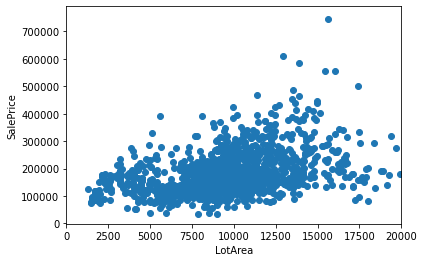

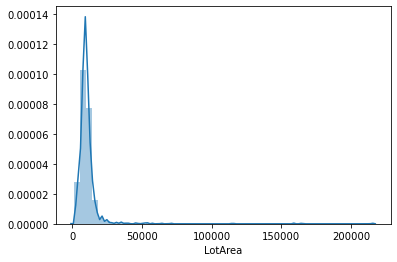

In [266]:
print(train.shape)
print(test.shape)
# EDA
x=train['LotArea']
z=train['MSSubClass']

y=train['SalePrice']

plt.scatter(x,y,cmap='r')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.xlim(0, 20000)
plt.show()
sns.distplot(x)

In [267]:

# To find the correlation among 
# the columns using pearson method 
corr_matrix = train.corr(method ='pearson').abs()
print(corr_matrix)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156     0.010601  0.033226     0.028365   
MSSubClass     0.011156    1.000000     0.386347  0.139781     0.032628   
LotFrontage    0.010601    0.386347     1.000000  0.426095     0.251646   
LotArea        0.033226    0.139781     0.426095  1.000000     0.105806   
OverallQual    0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609    0.059316     0.059213  0.005636     0.091932   
YearBuilt      0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd   0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea     0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1     0.005024    0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2     0.005968    0.065649     0.049900  0.111170     0.059119   
BsmtUnfSF      0.007940    0.140759     0.132644  0.002618     0.308159   
TotalBsmtSF    0.015415  

In [268]:

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

train.drop(to_drop,inplace=True,axis=1)

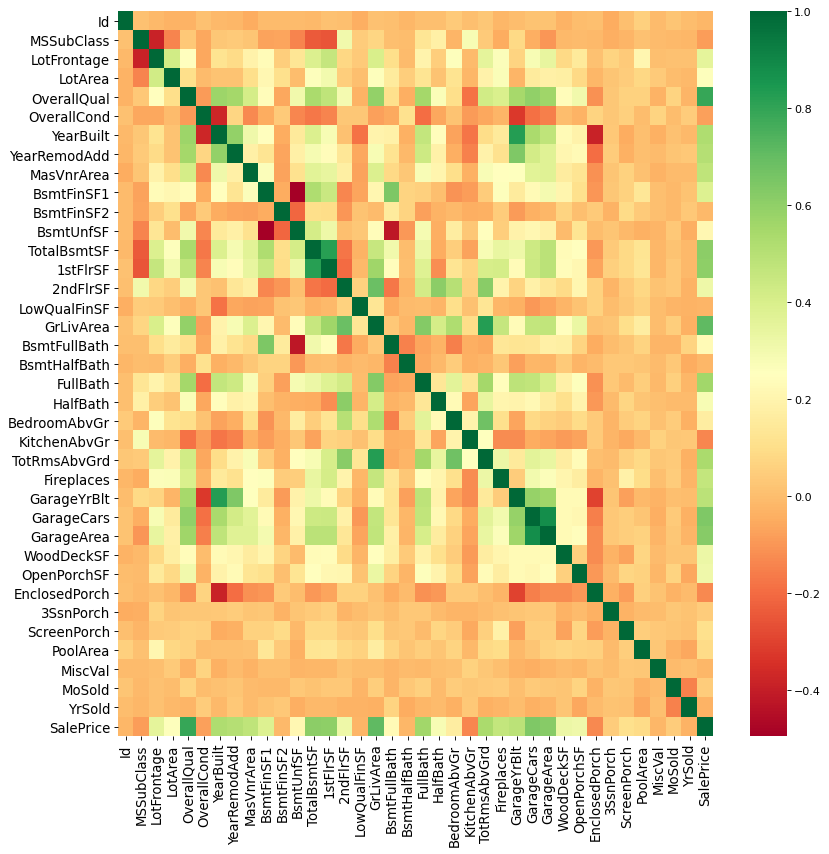

In [269]:
# heatmap
import seaborn as sns
plt.figure(figsize=(12,12), dpi= 80)
sns.heatmap(train.corr(), cmap='RdYlGn')

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [270]:
# manual highlighting imp corr features wrt sales price
'''OverallQual
1stFlrSF
TotalBsmtSF
YearBuilt
GarageArea
GarageCars
LotArea
MSSubClass'''

'OverallQual\n1stFlrSF\nTotalBsmtSF\nYearBuilt\nGarageArea\nGarageCars\nLotArea\nMSSubClass'

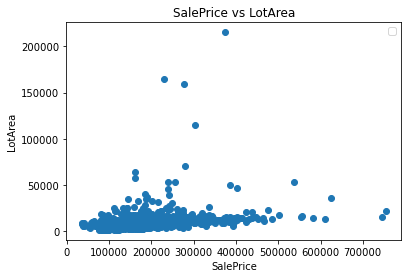

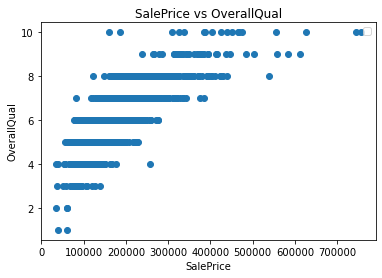

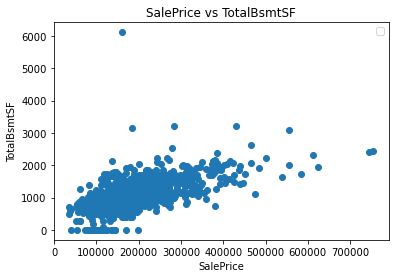

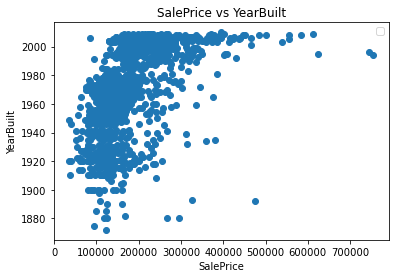

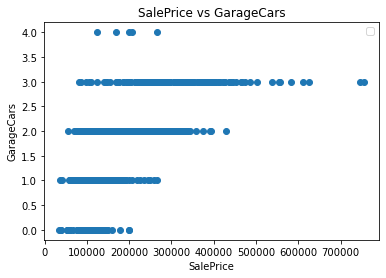

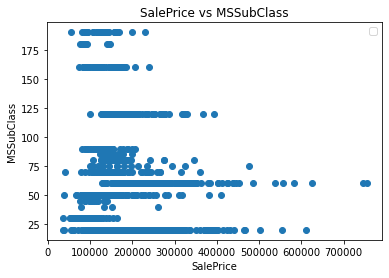

In [271]:
# multiple scatter plots
y_columns=['LotArea','OverallQual',
'TotalBsmtSF',
'YearBuilt',
'GarageCars','MSSubClass']
for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(train['SalePrice'], train[y_col])
    ax.set_xlabel('SalePrice')
    ax.set_ylabel(y_col)
    ax.set_title("SalePrice vs {}".format( y_col))

    plt.legend()
    plt.show()


In [272]:
# displayong total null values
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [273]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2'
               ,'PoolQC','MiscFeature']

# replace 'NaN' with 0 in these columns
for col in cols_fillna:
    train[col].fillna(0,inplace=True)
    test[col].fillna(0,inplace=True)
    #train[col] = train[col].apply(lambda x: 1 if not pd.isnull(x) else np.nan)

In [274]:

# handling null values , replacing with mean
x=train.isna().sum()
print(x.head(20))
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
train['Alley']=train['Alley'].replace(np.nan,0)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(),inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)
print(train['Alley'])
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: Alley, Length: 1460, dtype: object


,Total,Percent
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [275]:
# total null values are zero
print(train.isna().sum().sum())


0


In [276]:
# No of observations
print(train.shape[0])
# No of features
print(train.shape[1])
print(data.columns)
print(data.dtypes)
print(data.head(10))

1460
81
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [277]:
# finding categorical columns
categorical_data = [var for var in train.columns if train[var].dtype=='O']
categorical_features=pd.DataFrame(categorical_data)
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features.head(40))

Number of Categorical features:  43
               0
0       MSZoning
1         Street
2          Alley
3       LotShape
4    LandContour
5      Utilities
6      LotConfig
7      LandSlope
8   Neighborhood
9     Condition1
10    Condition2
11      BldgType
12    HouseStyle
13     RoofStyle
14      RoofMatl
15   Exterior1st
16   Exterior2nd
17    MasVnrType
18     ExterQual
19     ExterCond
20    Foundation
21      BsmtQual
22      BsmtCond
23  BsmtExposure
24  BsmtFinType1
25  BsmtFinType2
26       Heating
27     HeatingQC
28    CentralAir
29    Electrical
30   KitchenQual
31    Functional
32   FireplaceQu
33    GarageType
34  GarageFinish
35    GarageQual
36    GarageCond
37    PavedDrive
38        PoolQC
39         Fence


In [278]:

# process columns, apply LabelEncoder to categorical features
for c in categorical_data:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

In [279]:
# standardizing data
sc=StandardScaler()
sc.fit_transform(train)

array([[-1.73086488,  0.07337496, -0.04553194, ...,  0.31386709,
         0.2085023 ,  0.34727322],
       [-1.7284922 , -0.87256276, -0.04553194, ...,  0.31386709,
         0.2085023 ,  0.00728832],
       [-1.72611953,  0.07337496, -0.04553194, ...,  0.31386709,
         0.2085023 ,  0.53615372],
       ...,
       [ 1.72611953,  0.30985939, -0.04553194, ...,  0.31386709,
         0.2085023 ,  1.07761115],
       [ 1.7284922 , -0.87256276, -0.04553194, ...,  0.31386709,
         0.2085023 , -0.48852299],
       [ 1.73086488, -0.87256276, -0.04553194, ...,  0.31386709,
         0.2085023 , -0.42084081]])

Machine Learning models :


In [280]:
y = np.log(train.SalePrice)
X = train.drop(['SalePrice', 'Id'], axis=1)

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,LassoCV
import xgboost as xgb
from sklearn.model_selection import cross_val_score,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#  linear Regression 
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
x=lr.score(X_train,y_train)
print("Linear Reg score is ",x*100)
#*** 90.6% accuracy ***

# LassoRegression
params={"eps":[0.001,0.01,0.0001],"cv":[3,5,7],"n_alphas":[0.001,0.005,0.01]}

lasreg=LassoCV( eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, max_iter=1000, tol=0.0001, cv=5, verbose=True, selection='cyclic')
lasreg.fit(X_train,y_train)
#lasreg.score(X_train,y_train)
scores = cross_val_score(lasreg, X_train, y_train, cv=5)
print(scores)
lasreg.get_params()

Linear Reg score is  90.11375011525486


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
............................................................................................................................................................................................................................................................................

[0.79123363 0.80900209 0.80097321 0.41562501 0.79757751]


........................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': False,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': True}

In [282]:
# label encoding labels
from sklearn import utils
lab_enc = LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[557 371 295 ... 495 283 384]
continuous
multiclass
multiclass


In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# logistic Regression
# Instantiate a logistic regression 
las=Lasso()

'''
                                    ***for logreg ***
logreg =LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=1000)
c_grid=np.logspace(0, 4, 10)
logreg.fit(X_train,training_scores_encoded)
preds = logreg.predict(X_test) 
mean_squared_error(y_test,preds)'''

param_grid={"max_iter":[100,200,1000],"alpha":[1,0.8,0.5]}
logreg_cv = GridSearchCV(las,param_grid, cv=3)
    
# Fit it to the data
logreg_cv.fit(X_train,training_scores_encoded)


print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'alpha': 0.5, 'max_iter': 200}
Best score is 0.8389687598225382


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5986.286034450866, tolerance: 1729.5393692802058
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3861.295938041527, tolerance: 1688.9102790757381
  positive)


In [289]:
# using gradient boosting 

import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error
xg_reg = xgb.XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3,min_child_weight=0 , gamma=0, subsample=0.7, colsample_bytree=0.7, objective= 'reg:linear', reg_alpha=0.00006)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test) 
print('The accuracy of the xgboost is',r2_score(y_test,preds)*100) 
print ('RMSE is: \n', mean_squared_error(y_test,preds))
print(preds)
#*** 91% accuracy ***
# *** RMSE 0.013 ***

The accuracy of the xgboost is 89.25198639550504
RMSE is: 
 0.017605934422614617


In [285]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha':[1e-10,1e-8,1e-6,1e-4,1e-2,1,5,10,20,30,40,45,50,55,60]}
reg_r=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv = 5)
reg_r.fit(X_train,y_train)
# showing best parametrs and estimator
print(reg_r.best_estimator_)
print(reg_r.best_score_)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.26165e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.18031e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.77822e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.26297e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.98402e-18): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=10)
-0.02655562921686231


In [286]:

# using best estimator obtained from gridsearch and predicting
best=reg_r.best_estimator_
y_pred=best.predict(X_test)

x=best.score(X_test,y_test)
print(x)


0.8538909661058023


In [287]:
#submitting XGB predictions
sub = pd.DataFrame()
my_submission = pd.DataFrame({ 'SalePrice': predicted_prices})
sub['SalePrice'] = np.expm1(preds_xg)
sub.to_csv('Kaggel_submission.csv',index=False)
print('DONE')

DONE
